# BIO 456 Mini Project: Competing Populations 

**Authors:**

Pembe Gizem Ozdil, 323837, pembe.ozdil@epfl.ch & Zhengqing Wu, 323447, zhengqing.wu@epfl.ch

**Date:**

29.05.2021

In [1]:
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

np.random.seed(1234)
%matplotlib inline
plt.style.use('fast')
mpl.rcParams['figure.figsize'] = 5.8, 4.2
mpl.rcParams['font.size'] = 12

In [2]:
def plot_phase_plane(alpha,b1=0.5,b2=0.5,w_ee=3.0):
    """Plots the phase plane of Eq. 1
    Args:
        alpha: inhibition parameter
        b1: bias for population 1
        b2: bias for population 2
        w_ee: self-excitation parameter
    """
    A = np.array([[-1, 0],
                    [0, -1]])
    # Quadrant I) 1<=h1 and 1<=h2
    B_1 = np.array([w_ee-2*alpha, w_ee-2*alpha])
    # Quadrant II)
    B_2 = np.array([-alpha,w_ee -alpha])
    # Quadrant III) h1<=0 and h2<=0
    B_3 = np.array([0,0])
    # Quadrant IV) 1<=h1 and h2<=0
    B_4 = np.array([w_ee-alpha, -alpha])
    
    
    # Note that case 2 and 3 are symmetric.
    b = np.array([b1, b2])
    
    # Calculate the fixed-points
    h_fp_1 = np.linalg.solve(A,-b-B_1)
    h_fp_2 = np.linalg.solve(A,-b-B_2)
    h_fp_3 = np.linalg.solve(A,-b-B_3)
    h_fp_4 = np.linalg.solve(A,-b-B_4)
    
    print("Fixed points:", h_fp_1, h_fp_2, h_fp_3, h_fp_4)
    
    ## Plot the (virtual) fixed-points
    plt.plot(h_fp_1[0],h_fp_1[1],'ro')
    plt.plot(h_fp_2[0],h_fp_2[1],'mo')
    plt.plot(h_fp_3[0],h_fp_3[1],'ko')
    plt.plot(h_fp_4[0],h_fp_4[1],'bo')
    
    ## Plot some labels
    plt.axhline(y=0, color="black")
    plt.axhline(y=1, color="black")
    plt.axvline(x=0, color="black")
    plt.axvline(x=1, color="black")
    plt.axis('equal')
    plt.xlabel(r"$h_1$")
    plt.ylabel(r"$h_2$")
    #XLI = plt.xlim()
    #YLI = plt.ylim()
    hmax = 2.5
    plt.xlim(-hmax,1+hmax)
    plt.xlim(-hmax,1+hmax)
    plt.text(4,3,'I')
    plt.text(-3.2,3,'II')
    plt.text(-3.2,-2,'III')
    plt.text(4,-2,'IV')
    
    ## Plot the vector field
    mar = 0.0
    # Quadrant 1
    xx_1 = np.linspace(1+mar,1+hmax,num=8)
    yy_1 = np.linspace(1+mar,1+hmax,num=8)
    (XX_1, YY_1) = np.meshgrid(xx_1, yy_1)
    
    dX_1 = A[0][0]*XX_1 + A[0][1]*YY_1 + b[0] + B_1[0]
    dY_1 = A[1][0]*XX_1 + A[1][1]*YY_1 + b[1] + B_1[1]
    
    # Quadrant II
    xx_2 = np.linspace(-hmax,-mar,num=8)
    yy_2 = np.linspace(1+mar,1+hmax,num=8)
    (XX_2, YY_2) = np.meshgrid(xx_2, yy_2)
    
    dX_2 = A[0][0]*XX_2 + A[0][1]*YY_2 + b[0] + B_2[0]
    dY_2 = A[1][0]*XX_2 + A[1][1]*YY_2 + b[1] + B_2[1]
    
    # Quadrant III
    xx_3 = np.linspace(-hmax,-mar,num=8)
    yy_3 = np.linspace(-hmax,-mar,num=8)
    (XX_3, YY_3) = np.meshgrid(xx_3, yy_3)
    
    dX_3 = A[0][0]*XX_3 + A[0][1]*YY_3 + b[0] + B_3[0]
    dY_3 = A[1][0]*XX_3 + A[1][1]*YY_3 + b[1] + B_3[1]

    # Quadrant IV
    xx_4 = np.linspace(1+mar,1+hmax,num=8)
    yy_4 = np.linspace(-hmax,-mar,num=8)
    (XX_4, YY_4) = np.meshgrid(xx_4, yy_4)
    
    dX_4 = A[0][0]*XX_4 + A[0][1]*YY_4 + b[0] + B_4[0]
    dY_4 = A[1][0]*XX_4 + A[1][1]*YY_4 + b[1] + B_4[1]    

    # Plot the vector field in the four quadrants
    plt.quiver(XX_1, YY_1, dX_1, dY_1, color='r', pivot='mid', width=0.002)
    plt.quiver(XX_2, YY_2, dX_2, dY_2, color='m', pivot='mid', width=0.002)
    plt.quiver(XX_3, YY_3, dX_3, dY_3, color='k', pivot='mid', width=0.002)
    plt.quiver(XX_4, YY_4, dX_4, dY_4, color='b', pivot='mid', width=0.002)


# 3. Varying the inhibition parameter

## Question 5, 6

Fixed points: [1.5 1.5] [-0.5  2.5] [0.5 0.5] [ 2.5 -0.5]


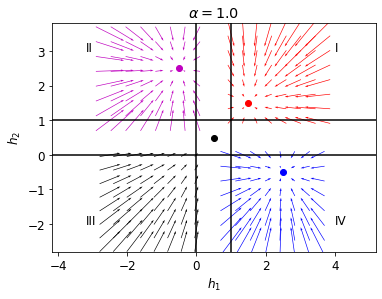

Fixed points: [0.7 0.7] [-0.9  2.1] [0.5 0.5] [ 2.1 -0.9]


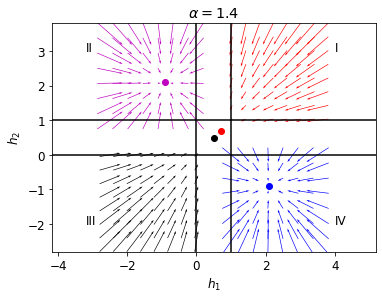

In [3]:
# We choose alpha = 1 for 3 stable fixed points.
fig, ax = plt.subplots()
alpha =1.
plot_phase_plane(alpha)
plt.title(r"$\alpha = 1.0$")
plt.savefig('q5_three_fixed_pt.png',bbox_inches = 'tight')
plt.show()

# We choose alpha = 1.4 for 2 stable fixed points.
fig, ax = plt.subplots()
alpha =1.4
plot_phase_plane(alpha)
plt.title(r"$\alpha = 1.4$")
plt.savefig('q6_two_fixed_pt.png',bbox_inches = 'tight')
plt.show()

# 4. Adding noise

In [4]:
def g(input_potential):
    """ Implementation of the gain function. """
    if input_potential <= 0:
        activity = 0
    elif input_potential > 0 and input_potential < 1:
        activity = input_potential
    else:
        activity = 1
    return activity


def behaviour_model(
    time,
    dt=0.01,
    b1=0.5, b2=0.5,
    w_ee=3.0,
    alpha=1., sigma=.5,
    scale=0.001,
    h1_0=0, h2_0=0
):
    """ Implementation of the behaviour model.

    Parameters
    ----------
    time : np.array
        Duration that the simulation will run.
    b1 : float
        Stimuli intensity to the population 1.
    b2 : float
        Stimuli intensity to the population 2.
    w_ee : float
        Self-excitation parameter.
    alpha : float
        Inhibition parameter.
    sigma : float
        Noise level.
    scale: float 
        Scaling of the noise.
        For correct scaling, set this value to square root of delta t.
    h1_0: float 
        Initial condition for h1
    h2_0: float 
        Initial condition for h2
        
    Returns
    -------
    h: np.array (2, time points)
        Trajectories of h1 and h2.

    """
    #: duration
    duration = int(time / dt)
    #: matrix containing the population dynamics
    h = np.zeros((2, duration))
    #: set initial conditions
    h[0][0] = h1_0
    h[1][0] = h2_0
    #: euler integration
    for t in range(duration - 1):
        #: h1
        h[0][t + 1] = h[0][t] + dt * (-h[0][t] + b1 + (w_ee - alpha) * g(
            h[0][t]) - alpha * g(h[1][t])) + scale * sigma * np.random.normal()
        #: h2
        h[1][t + 1] = h[1][t] + dt * (-h[1][t] + b2 + (w_ee - alpha) * g(
            h[1][t]) - alpha * g(h[0][t])) + scale * sigma * np.random.normal()
    return h


def plot_results(h, time, ax=None, title=None):
    """ Plot the population dynamics.

    Parameters
    ----------
    h : np.array (2, time points)
        Matrix containing the population dynamics.
    time: np.array (1, time points)
        Time
    ax: matplotlib.axes
        Axes that the data is to be plotted on. 
    title: str
        Title of the figure. 
    """
    if ax is None:
        ax = plt.gca()

    ax.plot(time, h[0][:], label='h1')
    ax.plot(time, h[1][:], label='h2')
    if title is None:
        ax.set_title(r"evolution $h_{1/2}$ through time")
    else:
        ax.set_title(title)

## Question 8 

In [5]:
def run_question8():
    """ Plots the results for the question 8. """
    fig, axs = plt.subplots(2,2, figsize=(9, 6))
    # use two different time scales
    for i, time_step in enumerate([0.01, 0.001]):
        # correct scaling
        duration = 50
        alpha = 1.4 # 2 fixed points
        sigma = 1.
        scale = np.sqrt(time_step) 
        # initial conditions
        h1_0 = .5
        h2_0 = .5
        # run the behaviour model
        h = behaviour_model(duration, time_step, scale=scale, alpha=alpha, h1_0=h1_0, h2_0=h2_0, sigma=sigma)
        picture_index = ['a','b']
        title = '({}) correct scaling with dt = {}'.format(picture_index[i],
            time_step)
        plot_results(h, np.arange(0, duration, time_step), ax=axs[0,i], title=title)
        axs[0,0].set_ylabel('Membrane potential (mV)')
        axs[0,1].legend(bbox_to_anchor=(1.03,1))
        # wrong scaling
        scale = time_step
        # run the behaviour model
        h = behaviour_model(duration, time_step, scale=scale, alpha=alpha, h1_0=h1_0, h2_0=h2_0, sigma=sigma)
        picture_index = ['c','d']
        title = '({}) wrong scaling with dt = {}'.format(picture_index[i-2],
            time_step)
        plot_results(h, np.arange(0, duration, time_step), ax=axs[1,i], title=title)
        axs[1,i].set_xlabel('Time (s)')        
        axs[1,0].set_ylabel('Membrane potential (mV)')

    plt.tight_layout()
    plt.savefig('q8_correct_wrong_scaling.png')
    plt.show()
    

No handles with labels found to put in legend.


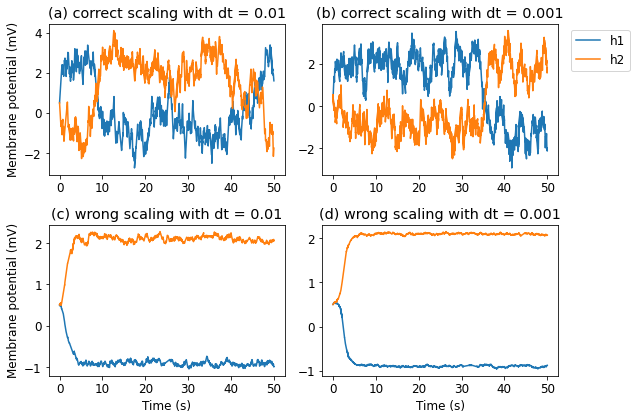

In [6]:
run_question8()

## Question 9

We found at question 3 that the fixed points for the Quadrant I is (b1 - alpha, b2 + w_ee - alpha) which gives (0.5 - alpha, 0.5 + 3 - alpha) where alpha is 1.0, the value where 3 fixed points are observed. So p = (-0.5, 2.5)

In [7]:
def run_question9():
    """ Plots the results for the question 9. """
    duration = 50
    time_step = 0.001
    # choose sigma sufficiently small
    alpha = 1. # determined at question 5
    sigma = 0.1
    scale = np.sqrt(time_step) # correct scaling
    # initial condition near a fixed point
    initial_condition = [2.3, -0.3]
    # run the behaviour model
    h = behaviour_model(duration, time_step, alpha=alpha, sigma=sigma, scale=scale,
                        h1_0=initial_condition[0], h2_0=initial_condition[1])
    
    # we first plot the trajectories
    title = r'$\sigma = {}$'.format(
        sigma)
    fig, axs = plt.subplots(2,1, figsize=(6, 8))
    plot_results(h, np.arange(0, duration, time_step), ax=axs[0], title=title)
    axs[0].set_ylabel("Membrane potential (mV)")
    axs[0].set_xlabel("Time (sec)")

    plot_phase_plane(alpha=alpha, b1=0.5, b2=0.5, w_ee=3.0)
    axs[1].plot(h[0][:], h[1][:],  alpha=0.3, color = 'green', label = 'Trajectory')
    axs[1].set_title("phase plane and the trajectory")
    axs[1].legend()
    plt.tight_layout()
    plt.savefig('q9_phase_trajectory.png')
    plt.show()

Fixed points: [1.5 1.5] [-0.5  2.5] [0.5 0.5] [ 2.5 -0.5]


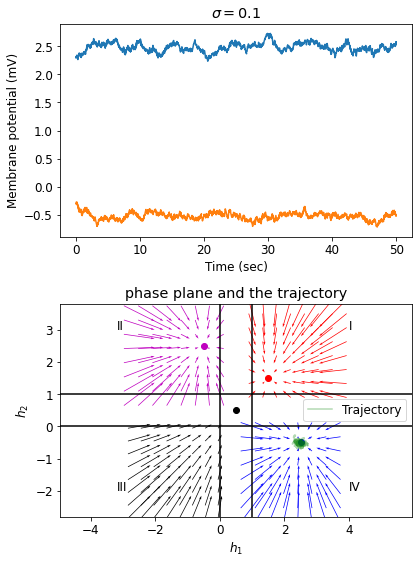

In [8]:
run_question9()

## Question 10

In [17]:
def run_question10():
    """ Plots the results for the question 10. """
    for i, sigma in enumerate([ 0.35, 0.5, 0.6, 0.7, 0.35]):
        fig, ax = plt.subplots(1,2, figsize = (12, 4))
        
        duration = 500 if sigma == 0.35 and i > 2 else 50
        time_step = 0.001
        alpha = 1.
        scale = np.sqrt(time_step)
        initial_condition = [2.3, -0.3]
        h = behaviour_model(duration, time_step, alpha=alpha, sigma=sigma, scale=scale,
                            h1_0=initial_condition[0], h2_0=initial_condition[1])

        plot_results(h, np.arange(0, duration, time_step), ax=ax[0])
        ax[0].set_ylabel("Membrane potential (mV)")
        ax[0].set_xlabel("Time (sec)")
        ax[0].legend()
     
        ax[1].plot(h[0][:], h[1][:],  alpha=0.3, color = 'green', label = 'Trajectory')
        plot_phase_plane(alpha=alpha, b1=0.5, b2=0.5, w_ee=3.0)
        ax[1].set_title("phase plane and the trajectory")
        ax[1].set_ylabel("h2")
        ax[1].set_xlabel("h1")
        ax[1].legend(loc = 3)

        plt.tight_layout()
        if sigma == 0.35 and i > 3:
            plt.suptitle(r'$\sigma = {}$ long time simulation'.format(sigma),y=1.1)
            plt.savefig('q10_random_jump_threshold_{}_long.png'.format(sigma))
        else:
            plt.suptitle(r'$\sigma = {}$'.format(sigma))
            plt.savefig('q10_random_jump_threshold_{}.png'.format(sigma))
        plt.show()

Fixed points: [1.5 1.5] [-0.5  2.5] [0.5 0.5] [ 2.5 -0.5]


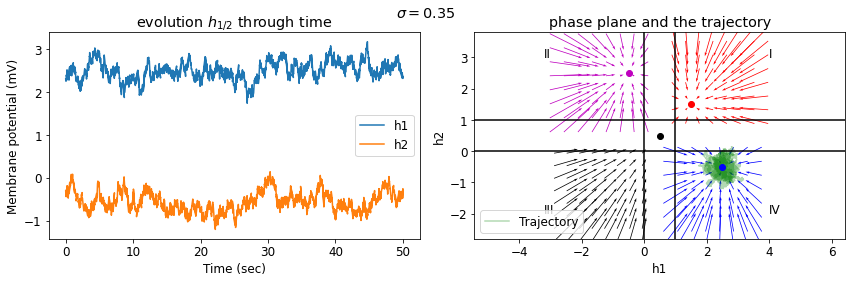

Fixed points: [1.5 1.5] [-0.5  2.5] [0.5 0.5] [ 2.5 -0.5]


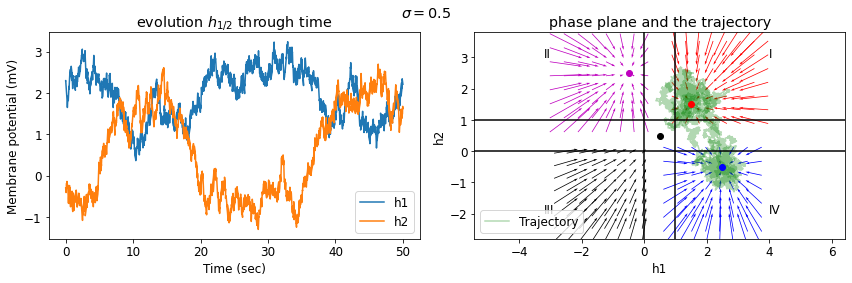

Fixed points: [1.5 1.5] [-0.5  2.5] [0.5 0.5] [ 2.5 -0.5]


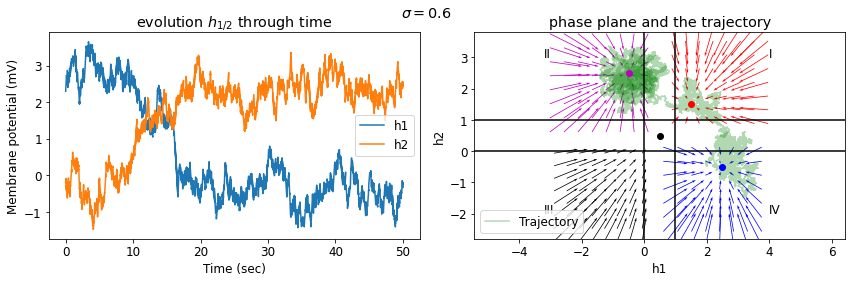

Fixed points: [1.5 1.5] [-0.5  2.5] [0.5 0.5] [ 2.5 -0.5]


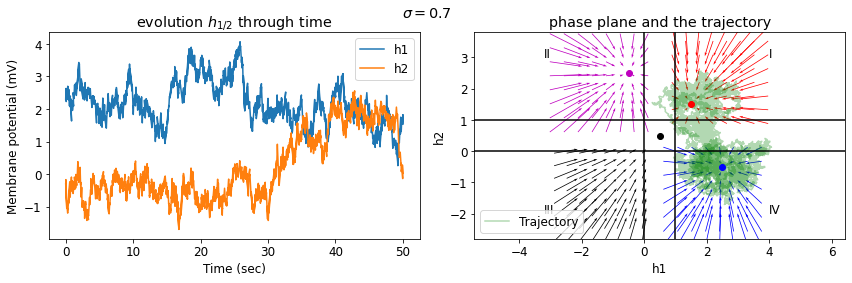

Fixed points: [1.5 1.5] [-0.5  2.5] [0.5 0.5] [ 2.5 -0.5]


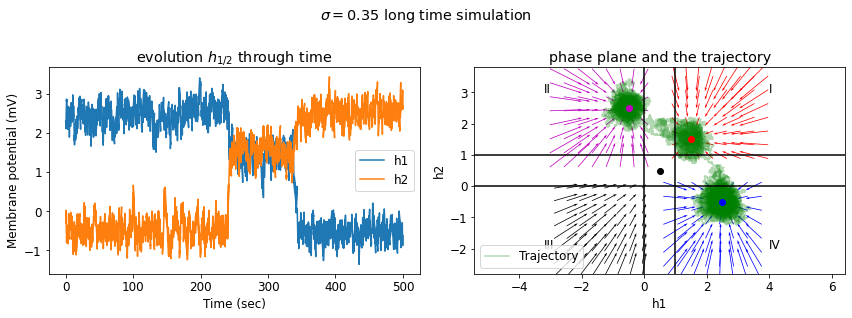

In [18]:
run_question10()

# Question 12 

In [19]:
def decision_criteria(h1, h2): 
    """ Decision criteria for the model. """
    activity_first = g(h1)
    activity_second = g(h2)
    
    if activity_first == 0 and activity_second == 1: 
        decision = 'first'
    elif activity_first == 1 and activity_second == 0:
        decision = 'second'
    else: 
        decision = 'none'
    return decision

In [20]:
def behaviour_model_decision_making(
    time,
    dt=0.01,
    b1=0.5, b2=0.5,
    w_ee=3.0,
    alpha=1., sigma=.5,
    scale=0.001,
    h1_0=0, h2_0=0
):
    """ Implementation of the behaviour model with decision making.

    Parameters
    ----------
    time : np.array
        Duration that the simulation will run.
    b1 : float
        Stimuli intensity to the population 1.
    b2 : float
        Stimuli intensity to the population 2.
    w_ee : float
        Self-excitation parameter.
    alpha : float
        Inhibition parameter.
    sigma : float
        Noise level.
    scale: float 
        Scaling of the noise.
        For correct scaling, set this value to square root of delta t.
    h1_0: float 
        Initial condition for h1
    h2_0: float 
        Initial condition for h2
        
    Returns
    -------
    h: np.array (2, time points)
        Trajectories of h1 and h2.
    decision: string
        Decision made (i.e. first, second or none)
    """
    #: duration
    duration = int(time / dt)
    #: matrix containing the population dynamics
    h = np.zeros((2, duration))
    #: set initial conditions
    h[0][0] = h1_0
    h[1][0] = h2_0
    #: euler integration
    for t in range(duration - 1):
        #: h1
        h[0][t + 1] = h[0][t] + dt * (-h[0][t] + b1 + (w_ee - alpha) * g(
            h[0][t]) - alpha * g(h[1][t])) + scale * sigma * np.random.normal()
        #: h2
        h[1][t + 1] = h[1][t] + dt * (-h[1][t] + b2 + (w_ee - alpha) * g(
            h[1][t]) - alpha * g(h[0][t])) + scale * sigma * np.random.normal()
        
    decision = decision_criteria(h[0][-1], h[1][-1])
    #print("{} decision is made when b1={} and b2={}".format(decision,b1,b2))
        
    return h, decision

In [21]:
def run_question12():
    """ Plots the results for the question 12. """
    duration = 10
    time_step = 0.001
    sigma = 0.1
    b1 = .5
    b2 = .5
    scale = np.sqrt(time_step)
    initial_condition = [-1, -1]
    alpha = 1.4 # found in question 6
    h, decision = behaviour_model_decision_making(duration, time_step, b1=b1, b2=b2, sigma=sigma, scale=scale, alpha=alpha,
                    h1_0=initial_condition[0], h2_0=initial_condition[1])
    
    fig, axs = plt.subplots(2,1, figsize=(6, 8))
    plot_results(h, np.arange(0, duration, time_step), ax=axs[0])
    axs[0].set_ylabel("Membrane potential (mV)")
    axs[0].set_xlabel("Time (sec)")
    axs[0].legend()

    axs[1].plot(h[0][:], h[1][:],  alpha=1., color = 'green', label = 'Trajectory')
    plot_phase_plane(alpha=alpha, b1=0.5, b2=0.5, w_ee=3.0)
    axs[1].set_title("phase plane and the trajectory")
    axs[1].set_ylabel("h2")
    axs[1].set_xlabel("h1")
    axs[1].legend()
    plt.suptitle("{} decision is made when b1={} and b2={}".format(decision,b1,b2))
    plt.tight_layout()
    plt.savefig('q12_decision_criteria.png'.format(sigma))
    plt.show()


Fixed points: [0.7 0.7] [-0.9  2.1] [0.5 0.5] [ 2.1 -0.9]


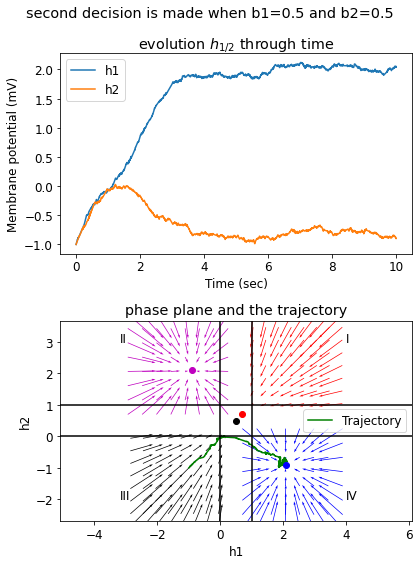

In [22]:
run_question12()

## Question 13

In [94]:
def run_beh_model(b1, b2):
    """ Runs behavioral model wrt given stimulus and returns the decision made and stimulus diff. """
    # simulation parameters 
    duration = 10
    time_step = 0.01
    sigma = 0.1
    scale = np.sqrt(time_step)
    initial_condition = [-1, -1]
    alpha = 1.4
    # run the model
    h, decision = behaviour_model_decision_making(duration, time_step, b1=b1, b2=b2,
                                                  sigma=sigma, scale=scale, alpha=alpha,
                                                  h1_0=initial_condition[0], h2_0=initial_condition[1]
                                                 )
    return b2-b1, decision

def calculate_probability(no_trials = 500, no_repeats = 12):
    """ Returns the probability of choosing decision first in no_trials. """
    global b1
    global b2_array

    b1 = 0.5
    b2_array = np.arange(0.0, 1.0, 0.01)
    prob_trials = np.zeros((no_repeats, b2_array.shape[0]))

    for i, b2 in enumerate(b2_array):
        for repeat in range(no_repeats):
            decisions = []
            for trial_no in range(no_trials):
                diff, decision_made = run_beh_model(b1,b2)
                decisions.append(decision_made)

            prob_trials[repeat, i] = decisions.count('first')/ len(decisions)
    
    return prob_trials

In [95]:
def calculate_std_mean(data):
    """ Calculates the standard deviation and mean across repeats. """
    return np.std(data, axis=0), np.mean(data, axis=0)        

In [96]:
def run_question13(no_trials):
    """ Plots the results of question 13."""
    trials = calculate_probability(no_trials)
    std, mean = calculate_std_mean(trials)
    
    fig, ax = plt.subplots()
    ax.plot(b2_array - b1, mean, label='mean probability')
    ax.fill_between(b2_array - 0.5, mean - std, mean + std, alpha = 0.3)
    ax.set_ylabel("Probability of choosing decision first")
    ax.set_xlabel("Stimulation difference (b2-b1)")
    ax.legend()
    plt.suptitle("Decision prob vs stimulus diff with standard deviation")
    plt.savefig("q13_probability_vs_stim.png")
    plt.show()

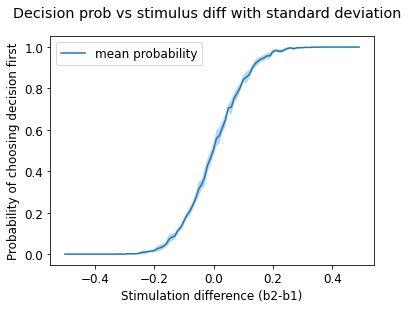

In [100]:
run_question13(no_trials=200)